## Question

Regression: Simple Linear 

Dataset : diabetes.csv

Apply Data pre-processing (Label Encoding , Data Transformation….) 

techniques if necessary.

Use any one feature of the dataset to train and test the regression model. Also 

calculate coefficients, residual sum of squares and the coefficient of determination

Frequency of question : 1

# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv('diabetes.csv')

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [6]:
# Assuming 'dependent_variable' is the name of your dependent variable column
correlation_matrix = dataset.corr()['DiabetesPedigreeFunction'].abs()

# Display the correlation values in descending order
sorted_correlation = correlation_matrix.sort_values(ascending=False)

In [7]:
sorted_correlation

DiabetesPedigreeFunction    1.000000
Insulin                     0.185071
SkinThickness               0.183928
Outcome                     0.173844
BMI                         0.140647
Glucose                     0.137337
BloodPressure               0.041265
Age                         0.033561
Pregnancies                 0.033523
Name: DiabetesPedigreeFunction, dtype: float64

In [8]:
ott = dataset.loc[dataset['Glucose'] == 0]

In [9]:
ott

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [10]:
dataset = dataset[dataset['Glucose'] != 0]


In [11]:
dataset.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     370
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     497
dtype: int64

In [12]:
X = dataset['Glucose'].values
y = dataset.iloc[:,-1].values

In [13]:
X.reshape(1,-1)

array([[148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
        189, 166, 100, 118, 107, 103, 115, 126,  99, 196, 119, 143, 125,
        147,  97, 145, 117, 109, 158,  88,  92, 122, 103, 138, 102,  90,
        111, 180, 133, 106, 171, 159, 180, 146,  71, 103, 105, 103, 101,
         88, 176, 150,  73, 187, 100, 146, 105,  84, 133,  44, 141, 114,
         99, 109, 109,  95, 146, 100, 139, 126, 129,  79,  62,  95, 131,
        112, 113,  74,  83, 101, 137, 110, 106, 100, 136, 107,  80, 123,
         81, 134, 142, 144,  92,  71,  93, 122, 163, 151, 125,  81,  85,
        126,  96, 144,  83,  95, 171, 155,  89,  76, 160, 146, 124,  78,
         97,  99, 162, 111, 107, 132, 113,  88, 120, 118, 117, 105, 173,
        122, 170,  84,  96, 125, 100,  93, 129, 105, 128, 106, 108, 108,
        154, 102,  57, 106, 147,  90, 136, 114, 156, 153, 188, 152,  99,
        109,  88, 163, 151, 102, 114, 100, 131, 104, 148, 120, 110, 111,
        102, 134,  87,  79,  75, 179,  85, 129, 143

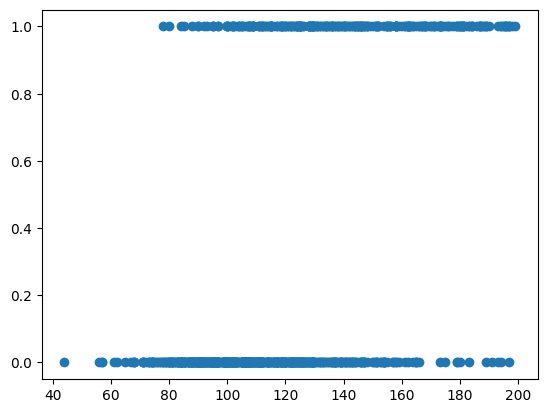

In [14]:
plt.scatter(X,y)